### CNN Data Sampling

**About this notebook:**

This notebook demonstrates a fundamental technique for preparing image data for Convolutional Neural Networks. By implementing a sliding window approach on the scikit-image coins dataset, we show how to effectively sample image patches for CNN training.

**Standardized Input Shapes for CNNs**

CNNs require input data to have consistent, standardized shapes - a critical constraint when working with image data. Unlike traditional neural networks that handle varying input sizes, CNNs use specialized layers with fixed-size filters that operate on spatial dimensions. This architecture demands that all input samples have identical height, width, and channel dimensions (e.g., 32×32×1 for grayscale or 224×224×3 for RGB images). The sliding window approach addresses this requirement by extracting uniform patches from irregular source images. U-NET architectures follow these same principles, as they incorporate CNN layers within their encoder-decoder structure. The U-NET's contracting path consists of convolutional layers that apply the same standardized input constraints, requiring fixed dimensions throughout the network. While U-NETs excel at image segmentation by combining high and low-level features through skip connections, they operate under the same dimensional restrictions as traditional CNNs, making proper patch sampling essential for successful implementation.

**Multi-dimensional Data Processing in Deep Neural Architectures**

When building CNNs and U-NETs for geospatial applications, developers must design networks to handle multi-dimensional data effectively. The typical setup starts with input layers that process multiple channels/bands (can be 5+), followed by stacked convolutional layers that find patterns at different scales. Data preparation pipelines normalize the various spectral bands while preserving their relationships. To save memory, developers often use patch-based processing and attention mechanisms for these large datasets. During training, specialized loss functions that account for spatial relationships improve performance on geographical tasks. The main challenge is balancing network depth with computational resources while ensuring the architecture captures important spatial patterns across all input dimensions.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from matplotlib.patches import Rectangle

In [2]:
def extract_patches(image, patch_size, stride):
    """
    Extract square patches from an image with specified size and stride.
    
    Parameters:
    -----------
    image : 2D numpy array
        Input image
    patch_size : int
        Size of the square patches
    stride : int
        Step size between patches
        
    Returns:
    --------
    list of 2D numpy arrays, list of (row, col) positions
        Extracted patches and their top-left positions
    """
    patches = []
    positions = []  # Store the top-left position of each patch
    h, w = image.shape
    
    for i in range(0, h - patch_size + 1, stride):
        for j in range(0, w - patch_size + 1, stride):
            patch = image[i:i + patch_size, j:j + patch_size]
            patches.append(patch)
            positions.append((i, j))
    
    return patches, positions


In [10]:
coins_original = data.coins()
coins = coins_original[14:-140, :]

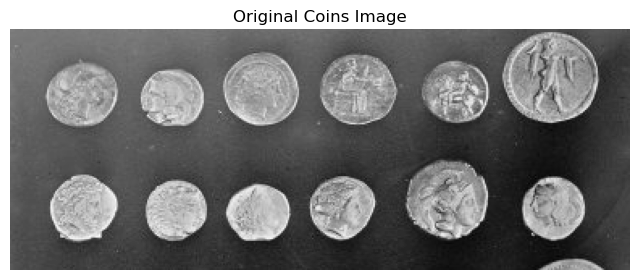

Image shape: (149, 384)


In [11]:
# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(coins, cmap='gray')
plt.title('Original Coins Image')
plt.axis('off')
plt.show()

print(f"Image shape: {coins.shape}")

In [12]:
# Block 2: Visualize the sliding window approach
patch_size = 64  # Size of square patches 
stride = 16      # Stride between patches

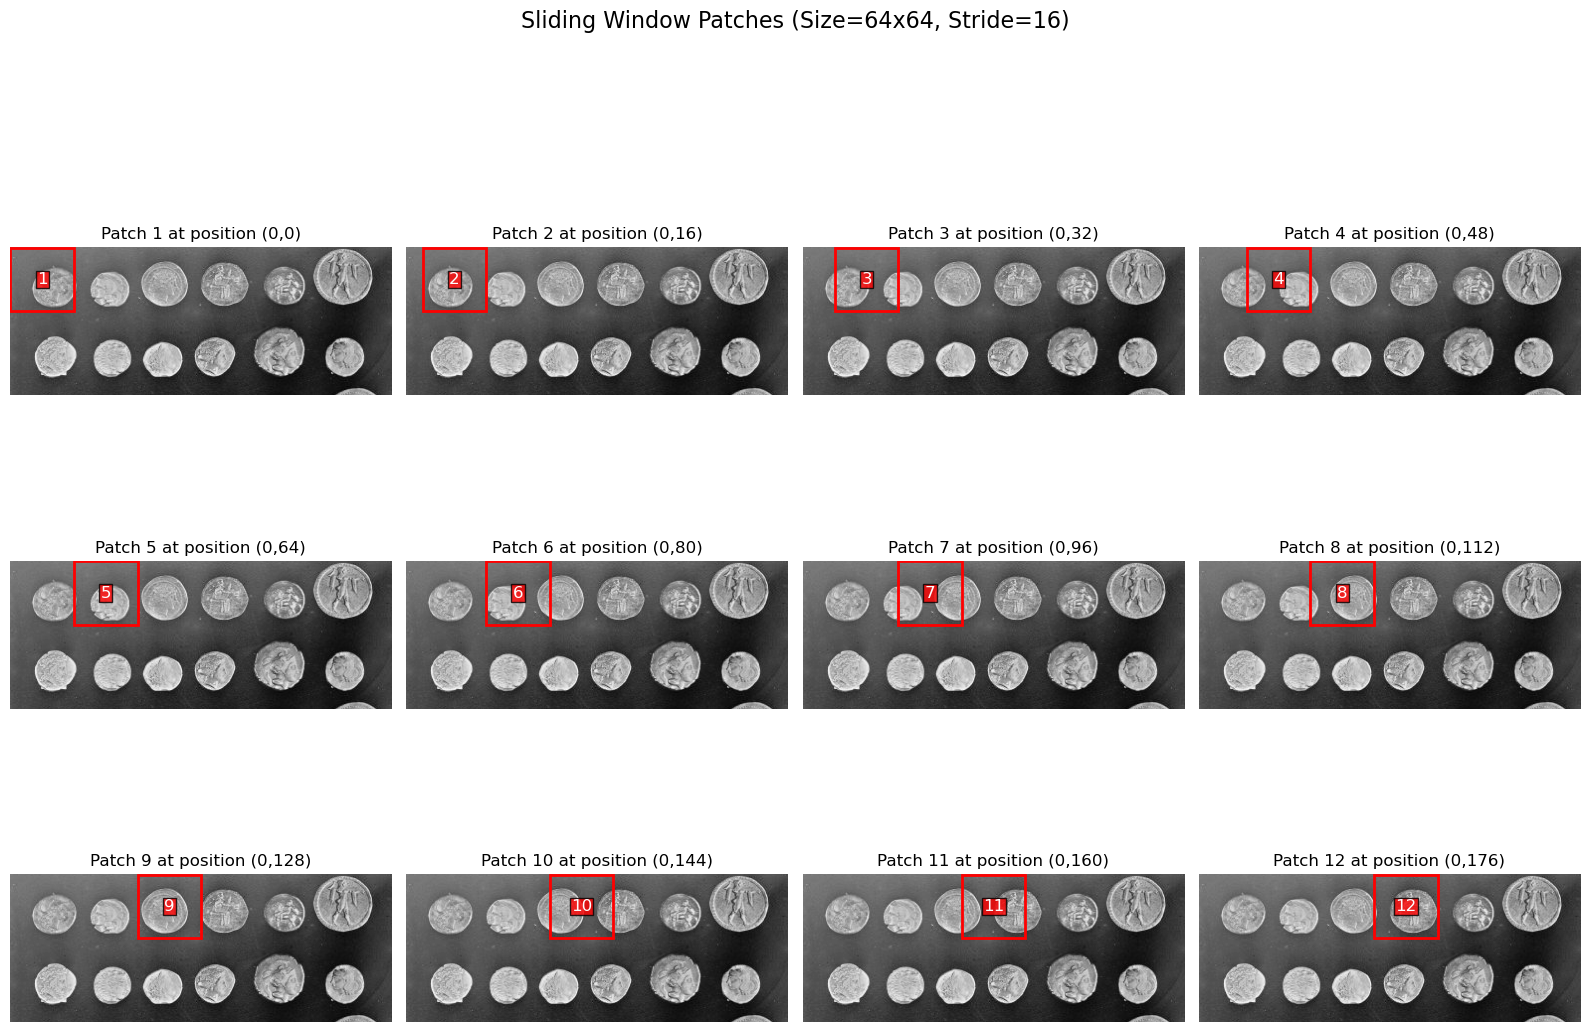

In [13]:
# Block 3: Show the moving window and extracted patches
# Extract all patches
all_patches, all_positions = extract_patches(coins, patch_size, stride)

# Display first 12 patches and their sliding window locations
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
fig.suptitle(f'Sliding Window Patches (Size={patch_size}x{patch_size}, Stride={stride})', fontsize=16)

for i in range(12):
    if i >= len(all_patches):
        break
        
    row, col = i // 4, i % 4
    ax = axes[row, col]
    
    # Display the original image
    ax.imshow(coins, cmap='gray')
    
    # Get the position of the current patch
    y, x = all_positions[i]
    
    # Draw a rectangle to show the patch location
    rect = Rectangle((x, y), patch_size, patch_size, 
                    linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    # Add the patch number
    ax.text(x + patch_size//2, y + patch_size//2, str(i+1), 
           color='white', fontsize=12, ha='center', va='center',
           bbox=dict(facecolor='red', alpha=0.8, pad=1))
    
    ax.set_title(f'Patch {i+1} at position ({y},{x})')
    ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

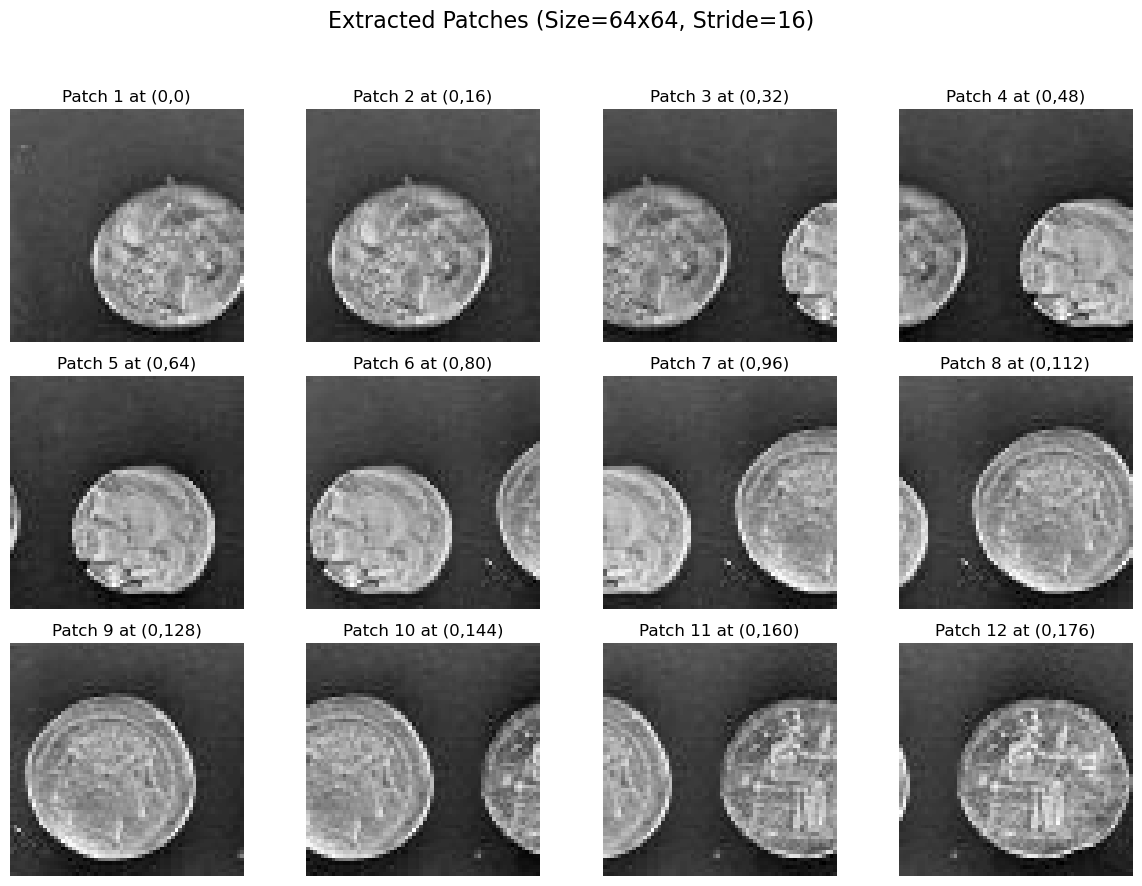

In [14]:
# Block 4: Now show just the extracted patches themselves
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle(f'Extracted Patches (Size={patch_size}x{patch_size}, Stride={stride})', fontsize=16)

for i in range(12):
    if i >= len(all_patches):
        break
        
    row, col = i // 4, i % 4
    ax = axes[row, col]
    
    # Display just the patch
    ax.imshow(all_patches[i], cmap='gray')
    y, x = all_positions[i]
    ax.set_title(f'Patch {i+1} at ({y},{x})')
    ax.axis('off')

# Hide any unused subplots
for i in range(min(12, len(all_patches)), 12):
    row, col = i // 4, i % 4
    axes[row, col].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()